# Perth Housing Analysis

In [1]:
# Import dependencies 

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Import Perth Housing CSV 
perth_housing = pd.read_csv('Perth_housing_data.csv')
perth_housing.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


## Clean the data ## 


In [3]:
# Delete irrelevant columsn = garage, address, floor area.
new_perth_housing = perth_housing.drop(['ADDRESS', 'GARAGE', 'FLOOR_AREA', 'NEAREST_SCH_RANK'] , axis =1)

# Remove all null values including
new_perth_housing.dropna(how ='any', inplace = True)

# Convert School distance to meters and convert to integer
new_perth_housing['NEAREST_SCH_DIST'] = (new_perth_housing[['NEAREST_SCH_DIST']] * 1000).astype(int)

#Convert Build Year to Integer 
new_perth_housing['BUILD_YEAR'] = new_perth_housing['BUILD_YEAR'].astype(int)

# Remove post codes which are out of Perth
new_perth_housing = new_perth_housing[new_perth_housing['POSTCODE'] < 6200]

In [4]:
#Check the properties of the dataframe is sufficient for assessment
new_perth_housing.shape

(30378, 15)

In [5]:
# Change datatype of DATE SOLD column to string to remove '/r' 
new_perth_housing[['DATE_SOLD']] = new_perth_housing[['DATE_SOLD']].astype('string')
new_perth_housing['DATE_SOLD'] = new_perth_housing['DATE_SOLD'].str[:7]

#Split Month and Year 
new_perth_housing['DATE_SOLD'] = pd.to_datetime(new_perth_housing['DATE_SOLD'])

# Add clean data to new frame
clean_perth_housing = new_perth_housing

C:\Users\jesss\AppData\Local\Temp\ipykernel_20924\868040009.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_perth_housing['DATE_SOLD'] = pd.to_datetime(new_perth_housing['DATE_SOLD'])


In [6]:
# Change datatype of DATE SOLD column to string to remove '/r' 
new_perth_housing[['DATE_SOLD']] = new_perth_housing[['DATE_SOLD']].astype('string')
new_perth_housing['DATE_SOLD'] = new_perth_housing['DATE_SOLD'].str[:7]

#Split Month and Year 
new_perth_housing['DATE_SOLD'] = pd.to_datetime(new_perth_housing['DATE_SOLD'])

# Add clean data to new frame
clean_perth_housing = new_perth_housing

C:\Users\jesss\AppData\Local\Temp\ipykernel_3612\868040009.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_perth_housing['DATE_SOLD'] = pd.to_datetime(new_perth_housing['DATE_SOLD'])


In [6]:
#Display Data
clean_perth_housing.head(5)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST
0,South Lake,565000,4,2,600,2003,18300,Cockburn Central Station,1800,2018-09-01,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,828
1,Wandi,365000,3,2,351,2013,26900,Kwinana Station,4900,2019-02-01,6167,-32.193470,115.859554,ATWELL COLLEGE,5524
2,Camillo,287000,3,1,719,1979,22600,Challis Station,1900,2015-06-01,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1649
3,Bellevue,255000,2,1,651,1953,17900,Midland Station,3600,2018-07-01,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1571
4,Lockridge,325000,4,1,466,1998,11200,Bassendean Station,2000,2016-11-01,6054,-31.885790,115.947780,KIARA COLLEGE,1514


In [40]:
# Create the bins and labels
size_bins = [0, 1000, 4000, 7000, 10000, 15000, 20000, 25000, 30000, 40000]
bin_label = ["<1","4-7","7-10","10-15","15-20","20-25", "25-30", "30-40",">40"]

# Catagorise distances based on bins
cbd_dist_summary = clean_perth_housing
cbd_dist_summary["Distance (km) to Perth CBD"] = pd.cut(clean_perth_housing["CBD_DIST"], size_bins, labels=bin_label)

# Calculate the average price per the bin catagories
cbd_house_price = cbd_dist_summary.groupby(["Distance (km) to Perth CBD"])["PRICE"].mean()

# Format presentation - add thousands seperator and dollar sign
cbd_house_price = round(cbd_house_price).map('{:,.0f}'.format)

# Create the dataframe
cbd_analysis = pd.DataFrame({'Average House Price ($)': cbd_house_price })

# Print analyses
cbd_analysis

,Average House Price ($)
Distance (km) to Perth CBD,
<1,"622,556"
4-7,"1,018,600"
7-10,"900,490"
10-15,"903,065"
15-20,"644,377"
20-25,"590,934"
25-30,"551,851"
30-40,"579,919"
>40,"451,639"


[]

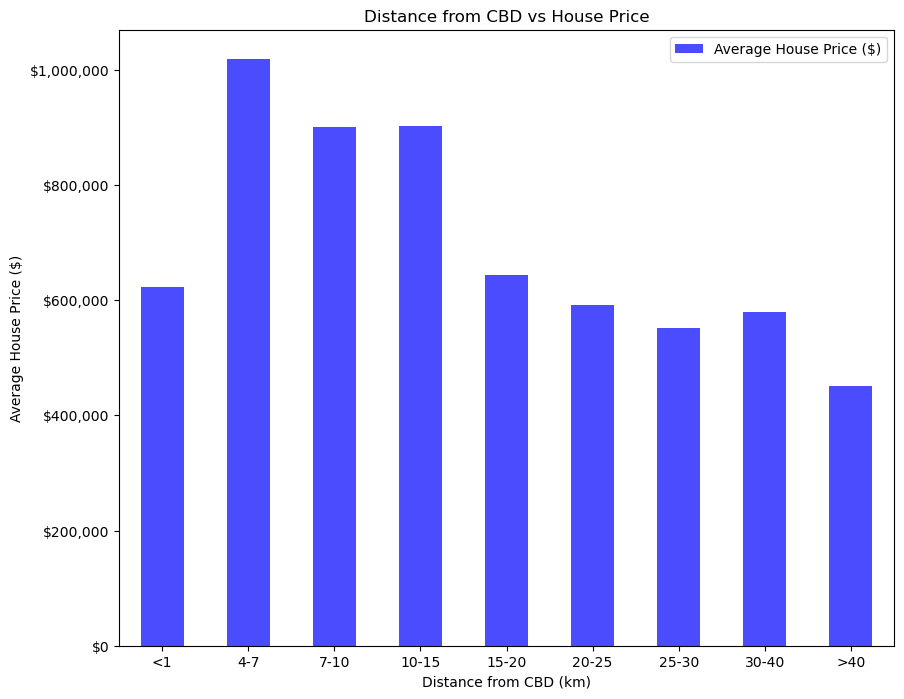

In [41]:
# Remove thousands seperator from DataFrame
cbd_analysis['Average House Price ($)'] = cbd_analysis['Average House Price ($)'].str.replace(',', '').astype(float)

# Plot graph
cbd_analysis.plot(kind='bar', figsize=(10,8), xlabel='Distance from CBD (km)', ylabel='Average House Price ($)', color='blue', alpha = 0.7)

# Set axis and titles
plt.title("Distance from CBD vs House Price")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation = 0)
plt.plot()

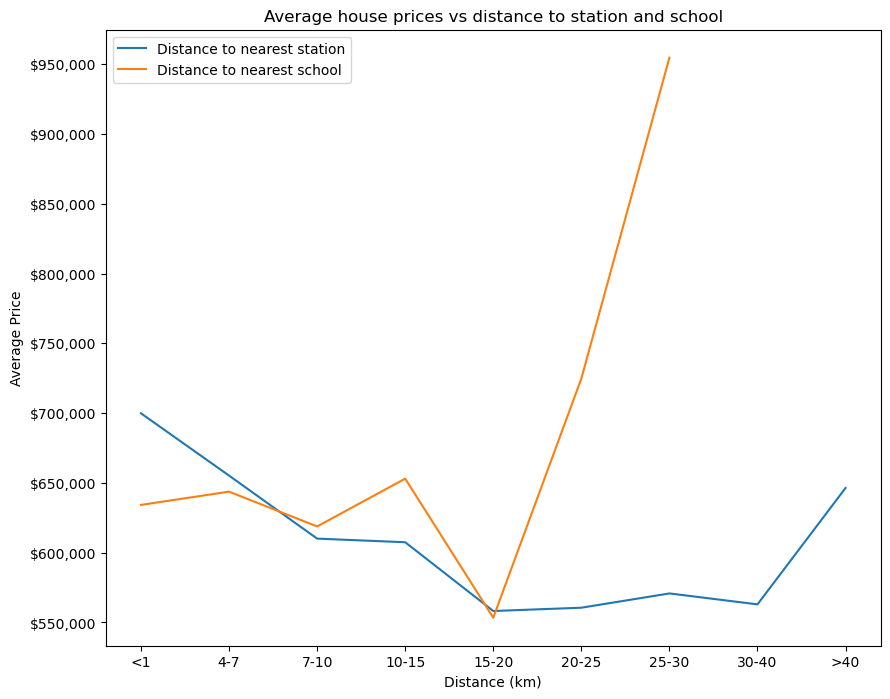

In [39]:
# Create the bins and labels
size_bins = [0, 1000, 4000, 7000, 10000, 15000, 20000, 25000, 30000, 40000]
bin_label = ["<1","4-7","7-10","10-15","15-20","20-25", "25-30", "30-40",">40"]

# Catagorise distances for schools and stations based on bins
stn_dist_summary = clean_perth_housing
stn_dist_summary["Distance (km) to station"] = pd.cut(clean_perth_housing["NEAREST_STN_DIST"], size_bins, labels=bin_label)
sch_dist_summary = clean_perth_housing
sch_dist_summary["Distance (km) to school"] = pd.cut(clean_perth_housing["NEAREST_SCH_DIST"], size_bins, labels=bin_label)

# Calculate the average price per the bin catagories
stn_house_price = stn_dist_summary.groupby(["Distance (km) to station"])["PRICE"].mean()
sch_house_price = sch_dist_summary.groupby(["Distance (km) to school"])["PRICE"].mean()

# Format presentation - add thousands seperator
stn_house_price = round(stn_house_price)
sch_house_price = round(sch_house_price)

# Create the dataframe and drop null values
stn_analysis = pd.DataFrame({'Average House Price ($)': stn_house_price }).dropna()
sch_analysis = pd.DataFrame({'Average House Price ($)': sch_house_price }).dropna()


# Plotting the distance to station data as a line
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(stn_analysis.index, stn_analysis, label='Distance to nearest station')

# Plotting the distance to school data as a line
ax1.plot(sch_analysis.index, sch_analysis, label='Distance to nearest school')

# Adding labels and title
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Average Price')
ax1.set_title('Average house prices vs distance to station and school')
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Adding a legend
ax1.legend(loc = 'upper left')

# Display the plot
plt.show()

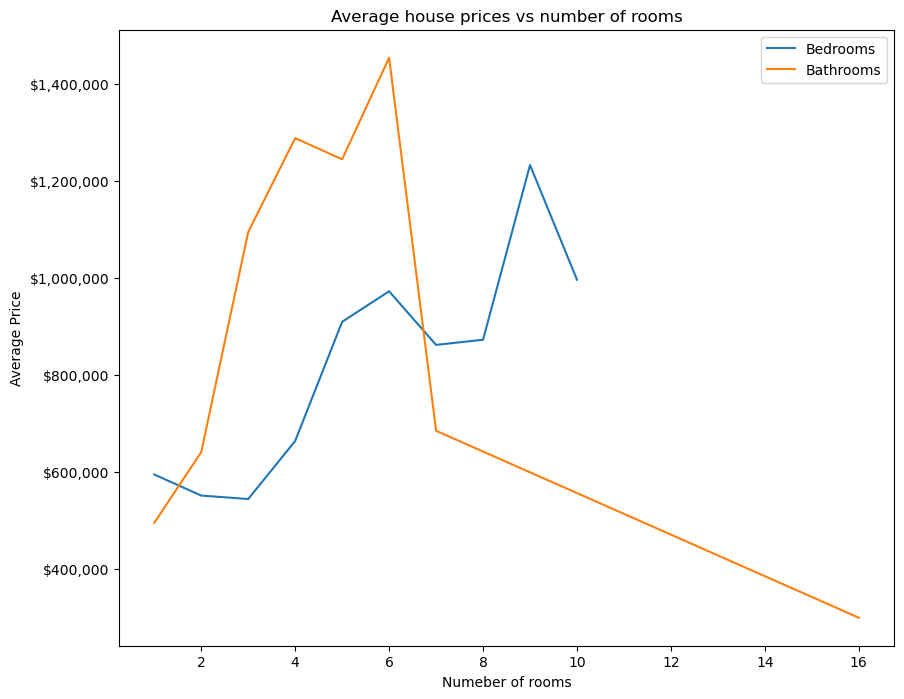

In [100]:
# Group by bathrooms and bedrooms and average the house price
bedroom_stats = clean_perth_housing.groupby('BEDROOMS').mean('PRICE')
bathroom_stats = clean_perth_housing.groupby('BATHROOMS').mean('PRICE')


# Plotting the average house prices vs number of bedrooms
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(bedroom_stats['PRICE'].index, bedroom_stats['PRICE'], label='Bedrooms')

# Plotting the average house prices vs number of bathrooms
ax1.plot(bathroom_stats['PRICE'].index, bathroom_stats['PRICE'], label='Bathrooms')

# Adding labels and title
ax1.set_xlabel('Numeber of rooms')
ax1.set_ylabel('Average Price')
ax1.set_title('Average house prices vs number of rooms')
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Adding a legend
ax1.legend(loc = 'upper right')

# Display the plot
plt.show()

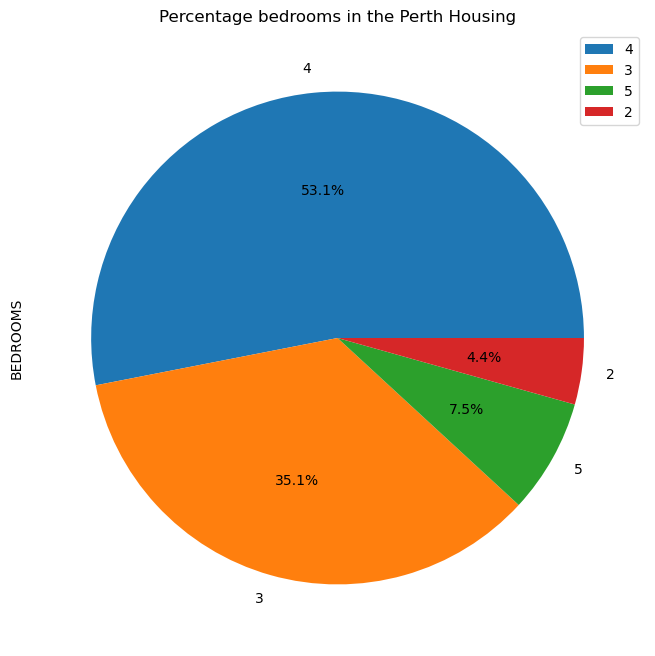

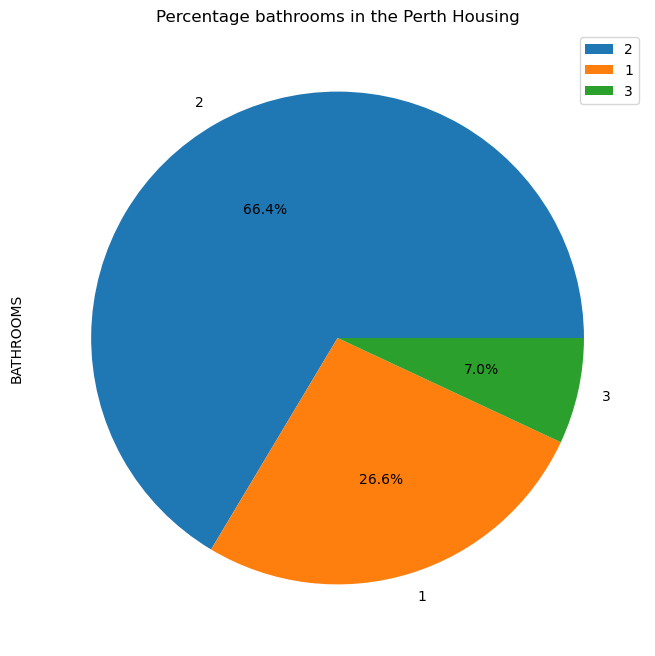

In [105]:
# Count total number of houses in the dataset
total_houses = clean_perth_housing['POSTCODE'].count()

# Group by number of bedrooms
bedroom_group = pd.DataFrame(clean_perth_housing['BEDROOMS'].value_counts())
bathroom_group = pd.DataFrame(clean_perth_housing['BATHROOMS'].value_counts())
# Calculate percentage for each bedroom in the dataset
bedroom_percent =pd.DataFrame((bedroom_group/total_houses)*100)
bathroom_percent =pd.DataFrame((bathroom_group/total_houses)*100)
# Remove bedrooms which are less than 1% of the total dataset
bathroom_percent
bedroom_percent = bedroom_percent[bedroom_percent['BEDROOMS'] > 1]
bathroom_percent = bathroom_percent[bathroom_percent['BATHROOMS'] > 1]


# Plot pie chart
bedroom_percent.plot(kind='pie', y = 'BEDROOMS', autopct = '%1.1f%%',figsize=(10, 8))
plt.title(label = 'Percentage bedrooms in the Perth Housing')
bathroom_percent.plot(kind='pie', y = 'BATHROOMS', autopct = '%1.1f%%',figsize=(10, 8))
plt.title(label = 'Percentage bathrooms in the Perth Housing')
plt.show()


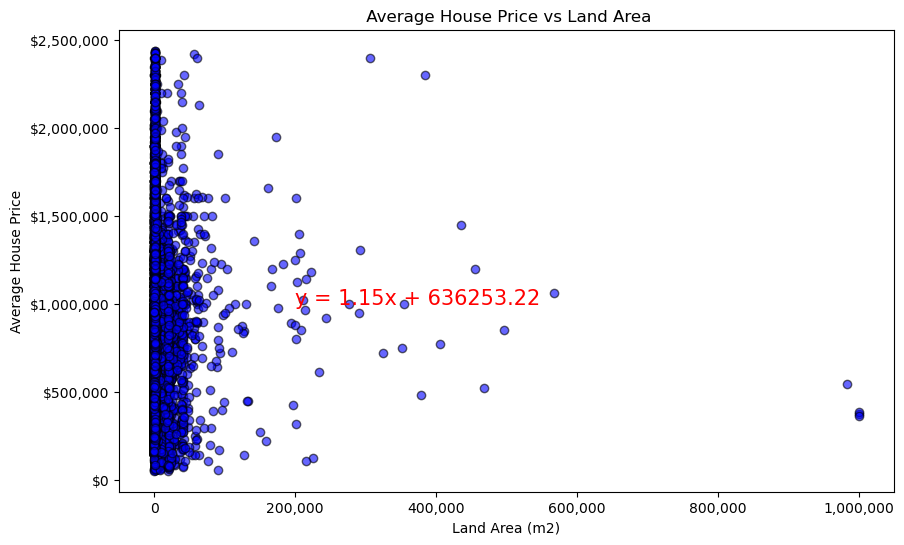

The r-squared is: 0.00296129153107386


In [110]:
# Set the axis values
x_value = clean_perth_housing['LAND_AREA']
y_value = clean_perth_housing['PRICE']

# Set regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create graph and format size
plt.figure(figsize=(10, 6))
plt.scatter(x_value, y_value, marker='o', color='blue', alpha=0.6, edgecolor='black')
plt.annotate(line_eq,(200000, 1000000),fontsize=15,color="red")

# plt.xticks(x_ticks)
plt.xlabel('Land Area (m2)')
plt.ylabel('Average House Price')
plt.title(' Average House Price vs Land Area')

# Format y-axis to readable amoutn 
formatterx = mticker.StrMethodFormatter('{x:,.0f}')
formattery = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formattery)
plt.gca().xaxis.set_major_formatter(formatterx)
plt.show()
print(f"The r-squared is: {rvalue**2}")



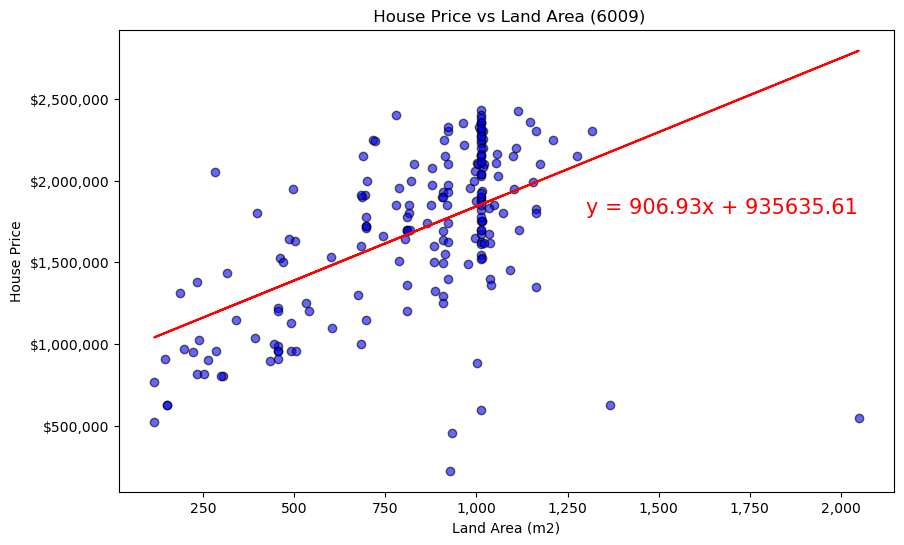

The r-squared is: 0.28625681882207415


In [37]:
# Filter for 6009 (Dalkieth post code - North of River)
x_value_filter = clean_perth_housing[clean_perth_housing['POSTCODE'] == 6009]

# Set Axis
x_value = x_value_filter['LAND_AREA']
y_value = x_value_filter['PRICE']

from scipy.stats import linregress
# Calculate regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create graph and format size
plt.figure(figsize=(10, 6))
plt.scatter(x_value, y_value, marker='o', color='blue', alpha=0.6, edgecolor='black')
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(1300, 1800000),fontsize=15,color="red")

# plt.xticks(x_ticks)
plt.xlabel('Land Area (m2)')
plt.ylabel('House Price')
plt.title(' House Price vs Land Area (6009)')

# Format y-axis to readable amoutn 
formatterx = mticker.StrMethodFormatter('{x:,.0f}')
formattery = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formattery)
plt.gca().xaxis.set_major_formatter(formatterx)
plt.show()
print(f"The r-squared is: {rvalue**2}")